In [1]:
import os, sys
sys.path.append("../")

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from matplotlib import gridspec
import numpy as np
from scipy.signal import savgol_filter
from scipy.interpolate import interp1d
import pandas as pd
from tqdm import *
import seaborn as sns

from grf.units import *
from grf.pk_interp import PowerSpectrumGridInterpolator
from grf.grf import FIRAS

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
from plot_params import params
pylab.rcParams.update(params)

cols_default = plt.rcParams['axes.prop_cycle'].by_key()['color']

/Users/smsharma/anaconda3/lib/python3.7/site-packages/matplotlib/__init__.py:855: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/Users/smsharma/anaconda3/lib/python3.7/site-packages/matplotlib/__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)


This notebook makes the main dark photon plots in our paper. The output arrays are obtained by running `cluster/firas_interface.py` on a cluster with several variations of parameters, which is done in `cluster/submit_firas.py`.

In [3]:
# Location of outputs of cluster runs
outputs_dir = "/Users/smsharma/chi2_arys/"

# Where to save plots
plots_dir = "../paper/draft-letter/plots/"

In [4]:
# Load a power spectrum
pspec_nonlin_matter = PowerSpectrumGridInterpolator("nonlin_matter_bj")

# Load an instance of FIRAS class
firas = FIRAS(pspec_nonlin_matter)

../grf/grf.py:633: FutureWarning: read_table is deprecated, use read_csv instead.
  names=['freq', 'I', 'residual', 'uncert', 'poles'])


In [5]:
# Load existing constraints
eps_SRF, lim_SRF = np.transpose(pd.read_csv("../data/existing_constraints/SRF.cvs", header=None).to_numpy())
eps_SRF_dot, lim_SRF_dot = np.transpose(pd.read_csv("../data/existing_constraints/SRFdotted.cvs", header=None).to_numpy())
jup_m, jup_eps = 10 ** np.transpose(pd.read_csv("../data/existing_constraints/Jupiter.txt", sep='\t').to_numpy())

## Main constraints plot (Fig. 3, left)

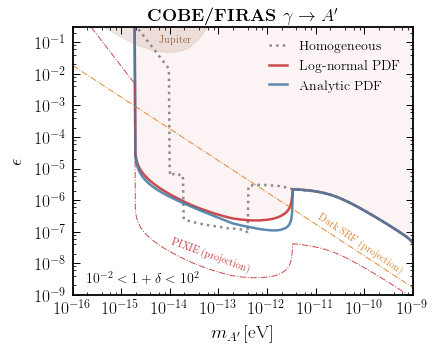

In [6]:
fig, ax = plt.subplots()

# Homogeneous curve

file_homo = np.load(outputs_dir + "firas_dp_scan_homo_pixie_0.npz")
m_A_ary = file_homo['m_A_ary'] / eV
limit_homo_ary = file_homo['limit']
limit_homo_ary[(limit_homo_ary > 1e-6) * (m_A_ary > 1e-13)] = savgol_filter(limit_homo_ary[(limit_homo_ary > 1e-6) * (m_A_ary > 1e-13)], 71, 3)

plt.plot(m_A_ary, limit_homo_ary, color='grey', ls='dotted', label="Homogeneous")

## Reset color cycle
plt.gca().set_prop_cycle(None)

# Lognormal with frankenspectrum curve

file_lower = np.load(outputs_dir + "firas_dp_scan_pdf_lognormal_franken_lower_cut_100.0_pixie_0_z_min_0.001_z_excise_max_20_b_1.npz")
m_A_ary = file_lower['m_A_ary'] / eV
limit_lower_ary = file_lower['limit']

file_upper = np.load(outputs_dir + "firas_dp_scan_pdf_lognormal_franken_upper_cut_100.0_pixie_0_z_min_0.001_z_excise_max_20_b_1.npz")
m_A_ary = file_upper['m_A_ary'] / eV
limit_upper_ary = file_upper['limit']

lim_LN_franken = np.max(np.transpose([limit_lower_ary, limit_upper_ary]), axis=1)

plt.fill_between(m_A_ary, lim_LN_franken, np.ones_like(limit_lower_ary), color=cols_default[0], alpha=0.05)
plt.plot(m_A_ary, lim_LN_franken, color=cols_default[0], label="Log-normal PDF")

# Analytic PDF curve

file = np.load(outputs_dir + "firas_dp_scan_pdf_log_analytic_pdf_interp_franken_upper_cut_100.0_pixie_0_z_min_0.001_z_excise_max_20.npz")
m_A_ary = file['m_A_ary'] / eV
limit_ary = file['limit']
plt.plot(m_A_ary, limit_ary, c=cols_default[1], label="Analytic PDF")

# Lognormal with frankenspectrum curve, PIXIE projection

file_lower = np.load(outputs_dir + "firas_dp_scan_pdf_lognormal_franken_lower_cut_100.0_pixie_1_z_min_0.001_z_excise_max_20_b_1.npz")
m_A_ary = file_lower['m_A_ary'] / eV
limit_lower_ary = file_lower['limit']

file_upper = np.load(outputs_dir + "firas_dp_scan_pdf_lognormal_franken_upper_cut_100.0_pixie_1_z_min_0.001_z_excise_max_20_b_1.npz")
m_A_ary = file_upper['m_A_ary'] / eV
limit_upper_ary = file_upper['limit']

# Homogeneous PIXIE curve, to stick at low masses

file_homo = np.load(outputs_dir + "firas_dp_scan_homo_pixie_1.npz")
m_A_ary = file_homo['m_A_ary'] / eV
limit_homo_ary = file_homo['limit']

lim_ary = np.max(np.transpose([limit_lower_ary, limit_upper_ary]), axis=1)

where = (limit_homo_ary < lim_ary) * (m_A_ary < 5e-15)
lim_ary[where] = limit_homo_ary[where]

plt.plot(m_A_ary, lim_ary, c=cols_default[0], ls='-.',lw=1)

# Existing and other projected bounds

## Jupiter bound
plt.fill_between(jup_m, jup_eps, np.ones_like(jup_eps), alpha=0.15, color=cols_default[6])

# Dark SRF projected bound
plt.plot([eps_SRF[0], eps_SRF[15]], [lim_SRF[0], lim_SRF[15]], ls='-.', c=cols_default[4], lw=1)

# Text labels

plt.text(1e-14, 4e-8, "PIXIE (projection)", color=cols_default[0], rotation=-20)
plt.text(1e-11, 2.5e-7, "Dark SRF (projection)", rotation=-34, color=cols_default[4])
plt.text(6e-15, 1e-1, "Jupiter", color=cols_default[6])
plt.text(2e-16, 2.5e-9, r"$10^{-2} < 1 + \delta < 10^2$", fontsize=14)

# Plot attributes

plt.xscale("log")
plt.yscale("log")

plt.xlabel(r"$m_{A^\prime}$\,[eV]") 
plt.ylabel(r"$\epsilon$")

plt.legend(fontsize=14, handlelength=1.3)

plt.title(r'\textbf{COBE/FIRAS $\gamma \rightarrow A^\prime$}')

plt.xlim(1e-16, 1e-9)
plt.ylim(1e-9, 0.3)

# Tick tweaks 

locmaj = matplotlib.ticker.LogLocator(base=10,numticks=12) 
ax.xaxis.set_major_locator(locmaj)

locmin = matplotlib.ticker.LogLocator(base=10.0,subs=(0.2,0.4,0.6,0.8),numticks=12)
ax.xaxis.set_minor_locator(locmin)
ax.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

locmaj = matplotlib.ticker.LogLocator(base=10,numticks=12) 
ax.yaxis.set_major_locator(locmaj)

locmin = matplotlib.ticker.LogLocator(base=10.0,subs=(0.2,0.4,0.6,0.8),numticks=12)
ax.yaxis.set_minor_locator(locmin)
ax.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

# Save

plt.tight_layout()
plt.savefig(plots_dir + "limit.pdf")

## Systematics plots

### $1 + \delta$ systematics plots (Fig. 6. top left)

In [7]:
def as_si(x, ndp, dolla=0):
    s = '{x:0.{ndp:d}e}'.format(x=x, ndp=ndp)
    m, e = s.split('e')
    if float(m) == 1.:
        s = r'10^{{{e:d}}}'.format(m=m, e=int(e))
    else:
        s = r'{m:s}\times 10^{{{e:d}}}'.format(m=m, e=int(e))
    if dolla:
        return '$' + s + '$'
    else:
        return s

In [8]:
colors_seq = sns.color_palette('Blues', n_colors=4) # sns.cubehelix_palette(4, start=1, rot=0)
colors_alt_seq = sns.color_palette('Reds', n_colors=4)

/Users/smsharma/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:449: UserWarning: The handle <matplotlib.lines.Line2D object at 0x1c2f1ae5f8> has a label of '_line4' which cannot be automatically added to the legend.
  'legend.'.format(handle, label))
/Users/smsharma/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:449: UserWarning: The handle <matplotlib.lines.Line2D object at 0x1c2f1aed30> has a label of '_line5' which cannot be automatically added to the legend.
  'legend.'.format(handle, label))
/Users/smsharma/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:449: UserWarning: The handle <matplotlib.lines.Line2D object at 0x1c2f1aee80> has a label of '_line6' which cannot be automatically added to the legend.
  'legend.'.format(handle, label))
/Users/smsharma/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:449: UserWarning: The handle <matplotlib.lines.Line2D object at 0x1c2f1bb0f0> has a label of '_line7' which cannot be automatically adde

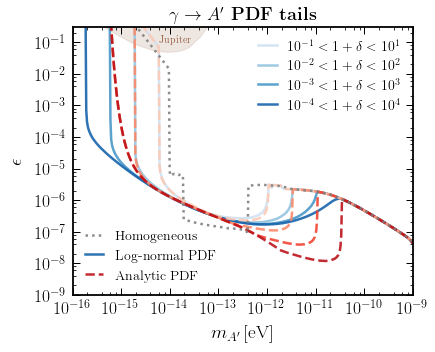

In [9]:
fig, ax=plt.subplots()

# 1 + \delta variations for log-normal with frankenspectrum (lower)
    
for i_d, one_plus_delta_bound in enumerate([10, 1e2, 1e3, 1e4]):

    file_lower = np.load(outputs_dir + "firas_dp_scan_pdf_lognormal_franken_lower_cut_" + str(one_plus_delta_bound) + "_pixie_0_z_min_0.001_z_excise_max_20_b_1.npz")
    m_A_ary = file_lower['m_A_ary'] / eV
    limit_lower_ary = file_lower['limit']

    plt.plot(m_A_ary, limit_lower_ary, label="$" + as_si(1 / one_plus_delta_bound, 1) + " < 1 + \delta < " + as_si(one_plus_delta_bound, 1) + "$", color=colors_seq[i_d])

# 1 + \delta variations for analytic PDF

for i_d, one_plus_delta_bound in enumerate([10, 1e2, 1e3, 1e4]):
        
    file_lower = np.load(outputs_dir + "firas_dp_scan_pdf_log_analytic_pdf_interp_franken_lower_cut_" + str(one_plus_delta_bound) + "_pixie_0_z_min_0.001_z_excise_max_20.npz")
    m_A_ary = file_lower['m_A_ary'] / eV
    limit_lower_ary = file_lower['limit']

    plt.plot(m_A_ary, limit_lower_ary, ls='--', color=colors_alt_seq[i_d])

# Jupyter bound

plt.fill_between(jup_m, jup_eps, np.ones_like(jup_eps), alpha=0.15, color=cols_default[6])

# Homogeneous curve

file_homo = np.load(outputs_dir + "firas_dp_scan_homo_pixie_0.npz")
m_A_ary = file_homo['m_A_ary'] / eV
limit_homo_ary = file_homo['limit']
limit_homo_ary[(limit_homo_ary > 1e-6) * (m_A_ary > 1e-13)] = savgol_filter(limit_homo_ary[(limit_homo_ary > 1e-6) * (m_A_ary > 1e-13)], 71, 3)

plt.plot(m_A_ary, limit_homo_ary, color='grey', ls='dotted', label="Homogeneous")

# Plot attributes

plt.plot([],[], label="Log-normal PDF", color=colors_seq[-1])
plt.plot([],[], ls='--', label="Analytic PDF", color=colors_alt_seq[-1])

plt.text(6e-15, 1e-1, "Jupiter", color=cols_default[6])

plt.xscale("log")
plt.yscale("log")

plt.xlabel(r"$m_{A^\prime}$\,[eV]") 
plt.ylabel(r"$\epsilon$")

lines = ax.get_lines()

## Create a legend for the first line.
first_legend = plt.legend(handles=lines[:-3], loc='upper right', fontsize=14, handlelength=1.3)

## Add the legend manually to the current Axes.
plt.gca().add_artist(first_legend)

## Create another legend for the second line.
plt.legend(handles=lines[-3:], loc='lower left', fontsize=14, handlelength=1.3)

plt.title(r'\textbf{$\gamma \rightarrow A^\prime$ PDF tails}')

plt.xlim(1e-16, 1e-9)
plt.ylim(1e-9, 0.3)

locmaj = matplotlib.ticker.LogLocator(base=10,numticks=12) 
ax.xaxis.set_major_locator(locmaj)

locmin = matplotlib.ticker.LogLocator(base=10.0,subs=(0.2,0.4,0.6,0.8),numticks=12)
ax.xaxis.set_minor_locator(locmin)
ax.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

locmaj = matplotlib.ticker.LogLocator(base=10,numticks=12) 
ax.yaxis.set_major_locator(locmaj)

locmin = matplotlib.ticker.LogLocator(base=10.0,subs=(0.2,0.4,0.6,0.8),numticks=12)
ax.yaxis.set_minor_locator(locmin)
ax.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

plt.tight_layout()
plt.savefig(plots_dir + "limit_dp_pdf_tails.pdf")

### PDF systematics (Fig. 6, top right)

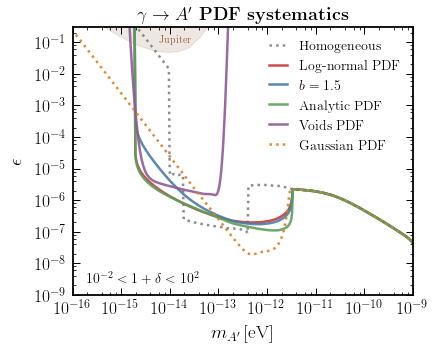

In [10]:
fig, ax=plt.subplots()

# Homogeneous curve

file_homo = np.load(outputs_dir + "firas_dp_scan_homo_pixie_0.npz")
m_A_ary = file_homo['m_A_ary'] / eV
limit_homo_ary = file_homo['limit']
limit_homo_ary[(limit_homo_ary > 1e-6) * (m_A_ary > 1e-13)] = savgol_filter(limit_homo_ary[(limit_homo_ary > 1e-6) * (m_A_ary > 1e-13)], 71, 3)

plt.plot(m_A_ary, limit_homo_ary, color='grey', ls='dotted', label="Homogeneous")

plt.gca().set_prop_cycle(None)

# Lognormal with frankenspectrum curve

file_lower = np.load(outputs_dir + "firas_dp_scan_pdf_lognormal_franken_lower_cut_100.0_pixie_0_z_min_0.001_z_excise_max_20_b_1.npz")
m_A_ary = file_lower['m_A_ary'] / eV
limit_lower_ary = file_lower['limit']

plt.plot(m_A_ary, limit_lower_ary, label=r"Log-normal PDF")
    
# b = 1.5 curve

b = 1.5
file_lower = np.load(outputs_dir + "firas_dp_scan_pdf_lognormal_franken_lower_cut_100.0_pixie_0_z_min_0.001_z_excise_max_20_b_" + str(b) + ".npz")
m_A_ary = file_lower['m_A_ary'] / eV
limit_lower_ary = file_lower['limit']

plt.plot(m_A_ary, limit_lower_ary, label="$b=" + str(b) + "$")

# Analytic PDF curve

file = np.load(outputs_dir + "firas_dp_scan_pdf_log_analytic_pdf_interp_franken_upper_cut_100.0_pixie_0_z_min_0.001_z_excise_max_20.npz")
m_A_ary = file['m_A_ary'] / eV
limit_ary = file['limit']
plt.plot(m_A_ary, limit_ary, label=r"Analytic PDF")

# Voids curve

file_lower = np.load(outputs_dir + "firas_dp_scan_pdf_voids_franken_lower_cut_-1_pixie_0_z_min_0.001_z_excise_max_20.npz")
m_A_ary = file_lower['m_A_ary'] / eV
limit_lower_ary = file_lower['limit']
plt.plot(m_A_ary, limit_lower_ary, label="Voids PDF")

# Gaussian curve

file_lower = np.load(outputs_dir + "firas_dp_scan_pdf_gaussian_franken_lower_cut_-1_pixie_0_z_min_0.001_z_excise_max_20.npz")
m_A_ary = file_lower['m_A_ary'] / eV
limit_lower_ary = file_lower['limit']
plt.plot(m_A_ary, limit_lower_ary, label="Gaussian PDF", ls='dotted')

# Jupyter bound
plt.fill_between(jup_m, jup_eps, np.ones_like(jup_eps), alpha=0.15, color=cols_default[6])
plt.text(6e-15, 1e-1, "Jupiter", color=cols_default[6])

# Plot attributes

plt.xscale("log")
plt.yscale("log")

plt.xlabel(r"$m_{A^\prime}$\,[eV]") 
plt.ylabel(r"$\epsilon$")

plt.legend(fontsize=14, handlelength=1.3)

plt.title(r'\textbf{$\gamma \rightarrow A^\prime$ PDF systematics}')

plt.xlim(1e-16, 1e-9)
plt.ylim(1e-9, 0.3)

locmaj = matplotlib.ticker.LogLocator(base=10,numticks=12) 
ax.xaxis.set_major_locator(locmaj)

locmin = matplotlib.ticker.LogLocator(base=10.0,subs=(0.2,0.4,0.6,0.8),numticks=12)
ax.xaxis.set_minor_locator(locmin)
ax.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

locmaj = matplotlib.ticker.LogLocator(base=10,numticks=12) 
ax.yaxis.set_major_locator(locmaj)

locmin = matplotlib.ticker.LogLocator(base=10.0,subs=(0.2,0.4,0.6,0.8),numticks=12)
ax.yaxis.set_minor_locator(locmin)
ax.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

plt.text(2e-16, 2.5e-9, r"$10^{-2} < 1 + \delta < 10^2$", fontsize=14)

plt.tight_layout()
plt.savefig(plots_dir + "limit_dp_pdfs.pdf")

### Redshift systematics

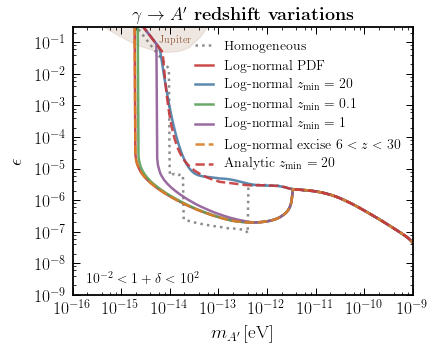

In [11]:
fig, ax=plt.subplots(figsize=(8 / 1.3, 6.5 / 1.3))

# Homogeneous curve

file_homo = np.load(outputs_dir + "firas_dp_scan_homo_pixie_0.npz")
m_A_ary = file_homo['m_A_ary'] / eV
limit_homo_ary = file_homo['limit']
limit_homo_ary[(limit_homo_ary > 1e-6) * (m_A_ary > 1e-13)] = savgol_filter(limit_homo_ary[(limit_homo_ary > 1e-6) * (m_A_ary > 1e-13)], 71, 3)

plt.plot(m_A_ary, limit_homo_ary, color='grey', ls='dotted', label="Homogeneous")

plt.gca().set_prop_cycle(None)

# Lognormal with frankenspectrum curve

file_lower = np.load(outputs_dir + "firas_dp_scan_pdf_lognormal_franken_lower_cut_100.0_pixie_0_z_min_0.001_z_excise_max_20_b_1.npz")
m_A_ary = file_lower['m_A_ary'] / eV
limit_lower_ary = file_lower['limit']

plt.plot(m_A_ary, limit_lower_ary, label=r"Log-normal PDF")

# Lognormal with frankenspectrum curve, z_min = 20

file_lower = np.load(outputs_dir + "firas_dp_scan_pdf_lognormal_franken_lower_cut_100.0_pixie_0_z_min_20_z_excise_max_20_b_1.npz")
m_A_ary = file_lower['m_A_ary'] / eV
limit_lower_ary = file_lower['limit']
limit_lower_ary[(limit_lower_ary > 1e-6) * (m_A_ary > 1e-13)] = savgol_filter(limit_lower_ary[(limit_lower_ary > 1e-6) * (m_A_ary > 1e-13)], 71, 3)
plt.plot(m_A_ary, limit_lower_ary, label=r'Log-normal $z_\mathrm{min} = 20$')

# Lognormal with frankenspectrum curve, z_min = 0.1

file_lower = np.load(outputs_dir + "firas_dp_scan_pdf_lognormal_franken_lower_cut_100.0_pixie_0_z_min_0.1_z_excise_max_20_b_1.npz")
m_A_ary = file_lower['m_A_ary'] / eV
limit_lower_ary = file_lower['limit']
plt.plot(m_A_ary, limit_lower_ary, label=r'Log-normal $z_\mathrm{min} = 0.1$')

# Lognormal with frankenspectrum curve, z_min = 

file_lower = np.load(outputs_dir + "firas_dp_scan_pdf_lognormal_franken_lower_cut_100.0_pixie_0_z_min_1_z_excise_max_20_b_1.npz")
m_A_ary = file_lower['m_A_ary'] / eV
limit_lower_ary = file_lower['limit']
plt.plot(m_A_ary, limit_lower_ary, label=r'Log-normal $z_\mathrm{min} = 1$')

# Lognormal with frankenspectrum curve, excise 6 < z < 30

file_lower = np.load(outputs_dir + "firas_dp_scan_pdf_lognormal_franken_lower_cut_100.0_pixie_0_z_min_0.001_z_excise_max_30_b_1.npz")
m_A_ary = file_lower['m_A_ary'] / eV
limit_lower_ary = file_lower['limit']
plt.plot(m_A_ary, limit_lower_ary, label=r"Log-normal excise $6 < z < 30$", ls='--')

# Analytic PDF, z_min = 20.

file = np.load(outputs_dir + "firas_dp_scan_pdf_log_analytic_pdf_interp_franken_upper_cut_100.0_pixie_0_z_min_20_z_excise_max_20.npz")
m_A_ary = file['m_A_ary'] / eV
limit_ary = file['limit']
limit_ary[(limit_ary > 1e-6) * (m_A_ary > 1e-13)] = savgol_filter(limit_ary[(limit_ary > 1e-6) * (m_A_ary > 1e-13)], 71, 3)
plt.plot(m_A_ary, limit_ary, label=r'Analytic $z_\mathrm{min} = 20$', ls='--', color=cols_default[9])

# Jupyter bound
plt.fill_between(jup_m, jup_eps, np.ones_like(jup_eps), alpha=0.15, color=cols_default[6])

plt.text(6e-15, 1e-1, "Jupiter", color=cols_default[6])

plt.xscale("log")
plt.yscale("log")

plt.xlabel(r"$m_{A^\prime}$\,[eV]") 
plt.ylabel(r"$\epsilon$")

plt.legend(fontsize=14, handlelength=1.3, loc='upper right')

plt.title(r'\textbf{$\gamma \rightarrow A^\prime$ redshift variations}')

plt.xlim(1e-16, 1e-9)
plt.ylim(1e-9, 0.3)

plt.text(2e-16, 2.5e-9, r"$10^{-2} < 1 + \delta < 10^2$", fontsize=14)

locmaj = matplotlib.ticker.LogLocator(base=10,numticks=12) 
ax.xaxis.set_major_locator(locmaj)

locmin = matplotlib.ticker.LogLocator(base=10.0,subs=(0.2,0.4,0.6,0.8),numticks=12)
ax.xaxis.set_minor_locator(locmin)
ax.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

locmaj = matplotlib.ticker.LogLocator(base=10,numticks=12) 
ax.yaxis.set_major_locator(locmaj)

locmin = matplotlib.ticker.LogLocator(base=10.0,subs=(0.2,0.4,0.6,0.8),numticks=12)
ax.yaxis.set_minor_locator(locmin)
ax.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

plt.tight_layout()
plt.savefig(plots_dir + "limit_dp_redshifts.pdf")

## $k_\mathrm{max}$ plot

In [12]:
firas = FIRAS(PowerSpectrumGridInterpolator("franken_lower"))

../grf/grf.py:633: FutureWarning: read_table is deprecated, use read_csv instead.
  names=['freq', 'I', 'residual', 'uncert', 'poles'])


In [13]:
m_ary = np.array([4e-15, 1e-13, 1e-12]) * eV
k_ary = np.logspace(-1, 4, 100)

In [14]:
lim_ary = np.zeros((len(m_ary), len(k_ary)))
for i_m, m in enumerate(m_ary):
    for i_k, k in enumerate(tqdm_notebook(k_ary)):
        lim_ary[i_m, i_k] = firas.get_lim([firas.chi2_FIRAS_scan(m, one_plus_delta_bound=1e2, z_int=[1e-3, 1e6], pdf="lognormal", k_max=k)])

/Users/smsharma/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


../grf/grf.py:170: RuntimeWarning: invalid value encountered in sqrt
  z_ary, self.omega(omega_0, z_ary, evolve_z))), nan=1e-18 * eV)
../grf/grf.py:176: RuntimeWarning: invalid value encountered in sqrt
  z, self.omega(omega_0, z, evolve_z))), nan=1e-18 * eV) - m_A
../grf/grf.py:366: RuntimeWarning: invalid value encountered in log
  sigma_LN_sq_ary / 2.) ** 2 / (2 * sigma_LN_sq_ary)) * (1. / (m_Ap ** 2 + (b - 1) * m_A_sq))
../grf/grf.py:369: RuntimeWarning: invalid value encountered in log
  ** 2 / (2 * sigma_LN_sq_ary)) / np.abs(self.dz_dt(z_mesh)) * (m_Ap ** 2 / (m_Ap ** 2 + (b - 1) * m_A_sq))
../grf/grf.py:246: RuntimeWarning: overflow encountered in exp
  return omega ** 3 / (2 * np.pi ** 2) * (np.exp(omega / T_N) - 1) ** -1
../grf/grf.py:246: RuntimeWarning: divide by zero encountered in reciprocal
  return omega ** 3 / (2 * np.pi ** 2) * (np.exp(omega / T_N) - 1) ** -1
../grf/grf.py:699: RuntimeWarning: invalid value encountered in matmul
  return (np.dot((self.d - t), np.matmul

In [15]:
# Homogeneous curve

file_homo = np.load(outputs_dir + "firas_dp_scan_homo_pixie_0.npz")
m_A_ary = file_homo['m_A_ary'] / eV
limit_homo_ary = file_homo['limit']

/Users/smsharma/anaconda3/lib/python3.7/site-packages/matplotlib/__init__.py:855: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/Users/smsharma/anaconda3/lib/python3.7/site-packages/matplotlib/__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)


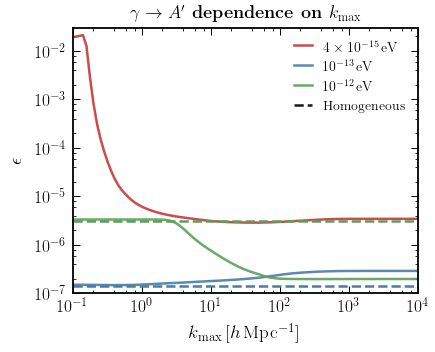

In [16]:
pylab.rcParams.update(params)

labels = [r"$4\times10^{-15}$\,eV","$10^{-13}$\,eV","$10^{-12}$\,eV"]
for i_m, m in enumerate(m_ary):
    plt.plot(k_ary, lim_ary[i_m], label=labels[i_m], color=cols_default[i_m])
    lim_homo = interp1d(m_A_ary, limit_homo_ary)(m / eV)
    if lim_homo < 1.:
        plt.axhline(lim_homo, color=cols_default[i_m], ls='--')
        
plt.plot([],[], c='k', ls='--', label='Homogeneous')

plt.xscale("log")
plt.yscale("log")

plt.xlabel("$k_\mathrm{max}$\,[$h$\,Mpc$^{-1}$]")
plt.ylabel(r"$\epsilon$")

plt.title(r"\textbf{$\gamma\to A'$ dependence on $k_\mathrm{max}$}")
plt.legend(fontsize=14, handlelength=1.3)
plt.xlim(min(k_ary), max(k_ary))
plt.ylim(1e-7, 0.03)

ax = plt.gca()

locmin = matplotlib.ticker.LogLocator(base=10.0,subs=(0.2,0.4,0.6,0.8),numticks=12)
ax.xaxis.set_minor_locator(locmin)
ax.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

locmin = matplotlib.ticker.LogLocator(base=10.0,subs=(0.2,0.4,0.6,0.8),numticks=12)
ax.yaxis.set_minor_locator(locmin)
ax.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())


plt.tight_layout()
plt.savefig("../paper/draft-letter/plots/limit_dp_k_max.pdf")

## Plot for data points

Text(2e-16, 2.5e-09, '$10^{-2} < 1 + \\delta < 10^2$')

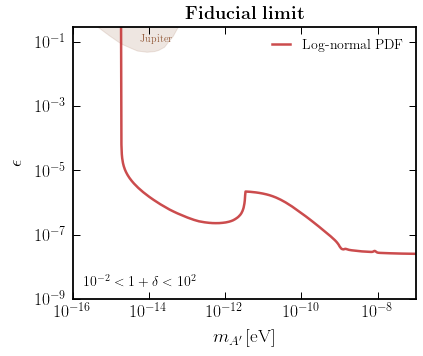

In [17]:
fig, ax=plt.subplots(figsize=(8 / 1.3, 6.5 / 1.3))

# Lognormal with frankenspectrum curve

file_lower = np.load(outputs_dir + "firas_dp_scan_widemass_1_pdf_lognormal_franken_lower_cut_100.0_pixie_0_z_min_0.001_z_excise_max_20_b_1.npz")
m_A_ary = file_lower['m_A_ary'] / eV
limit_lower_ary = file_lower['limit']

file_upper = np.load(outputs_dir + "firas_dp_scan_widemass_1_pdf_lognormal_franken_upper_cut_100.0_pixie_0_z_min_0.001_z_excise_max_20_b_1.npz")
m_A_ary = file_upper['m_A_ary'] / eV
limit_upper_ary = file_upper['limit']

lim_LN_franken = np.max(np.transpose([limit_lower_ary, limit_upper_ary]), axis=1)

plt.plot(m_A_ary, lim_LN_franken, label=r"Log-normal PDF")

# Jupyter bound
plt.fill_between(jup_m, jup_eps, np.ones_like(jup_eps), alpha=0.15, color=cols_default[6])

plt.text(6e-15, 1e-1, "Jupiter", color=cols_default[6])

plt.xscale("log")
plt.yscale("log")

plt.xlabel(r"$m_{A^\prime}$\,[eV]") 
plt.ylabel(r"$\epsilon$")

plt.legend(fontsize=14, handlelength=1.3, loc='upper right')

plt.title(r'\textbf{Fiducial limit}')

plt.xlim(1e-16, 1e-7)
plt.ylim(1e-9, 0.3)

plt.text(2e-16, 2.5e-9, r"$10^{-2} < 1 + \delta < 10^2$", fontsize=14)

In [16]:
df_fid = pd.DataFrame(np.transpose([m_A_ary, lim_LN_franken]), columns=['m_Ap [eV]', '\epsilon'])
df_fid.to_csv("../data/constraints/fiducial_DP_FIRAS_ln_one_plus_delta_1e2.csv", index = False)

In [14]:
file_homo = np.load(outputs_dir + "firas_dp_scan_homo_pixie_0.npz")
m_A_ary = file_homo['m_A_ary'] / eV
limit_homo_ary = file_homo['limit']

df_fid = pd.DataFrame(np.transpose([m_A_ary, limit_homo_ary]), columns=['m_Ap [eV]', '\epsilon'])
df_fid.to_csv("../data/constraints/fiducial_DP_FIRAS_homo.csv", index = False)